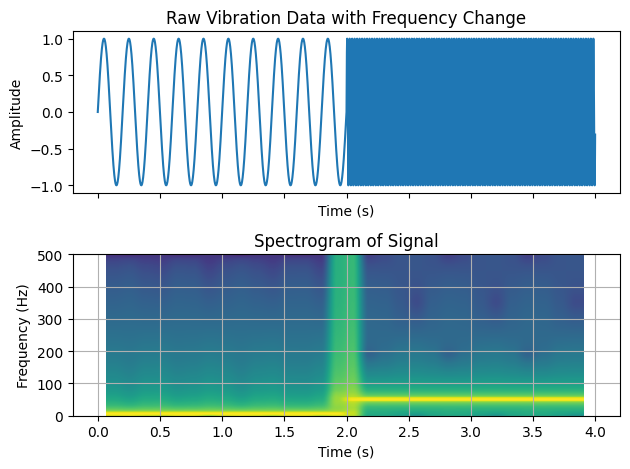

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 파라미터 설정
fs = 1000  # 샘플링 주파수
duration = 4  # 생성할 데이터의 전체 시간 (초)
t = np.arange(0, duration, 1/fs)  # 시간 배열

# 초기 주파수가 50 Hz인 신호 생성
initial_frequency = 5
signal = np.sin(2 * np.pi * initial_frequency * t)

# 주파수 변경 지점 설정 (예: 5초에서 주파수를 60 Hz로 변경)
change_point = 2  # 주파수 변경이 일어나는 시간 (초)
final_frequency = 50  # 변경 이후의 주파수

# 주파수 변경 지점 이전까지는 초기 주파수, 이후는 변경된 주파수로 설정
signal[:int(change_point * fs)] = np.sin(2 * np.pi * initial_frequency * t[:int(change_point * fs)])
signal[int(change_point * fs):] = np.sin(2 * np.pi * final_frequency * t[int(change_point * fs):])

# 원본 데이터 시각화
fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(t, signal)
ax[0].set_title('Raw Vibration Data with Frequency Change')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
plt.grid(True)

# plt.specgram을 사용하여 주파수 분석 수행
ax[1].specgram(signal, Fs=fs, cmap='viridis', NFFT=256, noverlap=128)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_title('Spectrogram of Signal')

plt.tight_layout()
plt.show()